In [48]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [49]:
# Directory where your Excel files are located
#directory = r'C:\Users\IRAXA11\Documents\Research\Recovery Rates Project'
directory = r'C:\Users\angel\Documents\Economics\Research\Recovery Rates Project\Data\Italian_Dataset'

### Loading & Merging Italian Yields 

In [50]:
# load data for the yield curves 
it_yield_3y = pd.read_excel('IT_Yields_until3Y.xlsx')
it_yield_4y_20y = pd.read_excel('IT_Yields_4_to_20Y.xlsx')
it_yield_30y_50y = pd.read_excel('IT_Yields_30_to_50Y.xlsx')

In [51]:
# rename and drop useless columns
it_yield_3y = it_yield_3y.drop(columns=['I40 EUR Italy Sovereign Curve 6M (Mid YTM) - I40 EUR Italy Sovereign Curve 3M (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 1Y (Mid YTM) - I40 EUR Italy Sovereign Curve 3M (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 2Y (Mid YTM) - I40 EUR Italy Sovereign Curve 3M (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 3Y (Mid YTM) - I40 EUR Italy Sovereign Curve 3M (Mid YTM)'])

it_yield_3y = it_yield_3y.rename(columns={ 'I40 EUR Italy Sovereign Curve 3M(BOTS 0 05/31/24 <Corp>) (Mid YTM)':'3M',
                         'I40 EUR Italy Sovereign Curve 6M(BOTS 0 07/31/24 <Corp>) (Mid YTM)':'6M',  
                         'I40 EUR Italy Sovereign Curve 1Y(BOTS 0 01/14/25 <Corp>) (Mid YTM)':'12M',
                         'I40 EUR Italy Sovereign Curve 2Y(BTPS 3.6 09/29/25 <Corp>) (Mid YTM)': '24M',
                         'I40 EUR Italy Sovereign Curve 3Y(BTPS 3.85 09/15/26 <Corp>) (Mid YTM)': '36M'})

it_yield_3y = it_yield_3y[['Date','3M', '6M', '12M', '24M', '36M']]

In [52]:
# rename and drop useless columns
it_yield_4y_20y = it_yield_4y_20y.drop(columns=['I40 EUR Italy Sovereign Curve 5Y (Mid YTM) - I40 EUR Italy Sovereign Curve 4Y (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 10Y (Mid YTM) - I40 EUR Italy Sovereign Curve 4Y (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 15Y (Mid YTM) - I40 EUR Italy Sovereign Curve 4Y (Mid YTM)',
       'I40 EUR Italy Sovereign Curve 20Y (Mid YTM) - I40 EUR Italy Sovereign Curve 4Y (Mid YTM)'])

it_yield_4y_20y = it_yield_4y_20y.rename(columns={'I40 EUR Italy Sovereign Curve 4Y(BTPS 2 02/01/28 <Corp>) (Mid YTM)':'48M', 
                         'I40 EUR Italy Sovereign Curve 5Y(BTPS 4.1 02/01/29 <Corp>) (Mid YTM)':'60M', 
                         'I40 EUR Italy Sovereign Curve 10Y(BTPS 4.2 03/01/34 <Corp>) (Mid YTM)':'120M',
                         'I40 EUR Italy Sovereign Curve 15Y(BTPS 3 ¼ 03/01/38 <Corp>) (Mid YTM)': '180M',
                         'I40 EUR Italy Sovereign Curve 20Y(BTPS 4.45 09/01/43 <Corp>) (Mid YTM)': '240M'})

In [53]:
# rename and drop useless columns
it_yield_30y_50y = it_yield_30y_50y.drop(columns=['I40 EUR Italy Sovereign Curve 50Y (Mid YTM) - I40 EUR Italy Sovereign Curve 30Y (Mid YTM)'])

it_yield_30y_50y = it_yield_30y_50y.rename(columns={'I40 EUR Italy Sovereign Curve 30Y(BTPS 4 ½ 10/01/53 <Corp>) (Mid YTM)':'360M', 
                         'I40 EUR Italy Sovereign Curve 50Y(BTPS 2.15 03/01/2072 <Corp>) (Mid YTM)':'600M'})

In [54]:
# temporary merge 
temp = pd.merge(it_yield_4y_20y, it_yield_30y_50y, on='Date')

In [55]:
# merge to create the yield dataset  
it_yield_df = pd.merge(it_yield_3y, temp, on='Date')

### Loading & Merging German Yields 

In [56]:
# load data for the yield curves 
ger_yield_2y = pd.read_excel('Germany_yields_3M_to_2Y.xlsx')
ger_yield_3y_15y = pd.read_excel('Germany_yields_3Y_to_15Y.xlsx')
ger_yield_20y_30y = pd.read_excel('Germany_yields_20Y_to_30Y.xlsx')

In [57]:
# rename and drop useless columns
ger_yield_2y = ger_yield_2y.drop(columns=['I16 EUR German Sovereign Curve 1Y (Mid YTM) - I16 EUR German Sovereign Curve 3M (Mid YTM)',
       'I16 EUR German Sovereign Curve 6M (Mid YTM) - I16 EUR German Sovereign Curve 3M (Mid YTM)',
       'I16 EUR German Sovereign Curve 9M (Mid YTM) - I16 EUR German Sovereign Curve 3M (Mid YTM)',
       'I16 EUR German Sovereign Curve 2Y (Mid YTM) - I16 EUR German Sovereign Curve 3M (Mid YTM)'])

ger_yield_2y = ger_yield_2y.rename(columns={ 'I16 EUR German Sovereign Curve 3M(BUBILL 0 05/15/24 <Corp>) (Mid YTM)':'3M',
                         'I16 EUR German Sovereign Curve 6M(BUBILL 0 08/21/24 <Corp>) (Mid YTM)':'6M',  
                         'I16 EUR German Sovereign Curve 9M(BUBILL 0 10/16/24 <Corp>) (Mid YTM)':'9M',
                         'I16 EUR German Sovereign Curve 1Y(BUBILL 0 01/15/25 <Corp>) (Mid YTM)': '12M',
                         'I16 EUR German Sovereign Curve 2Y(BKO 2 ½ 03/19/26 <Corp>) (Mid YTM)': '24M'})
ger_yield_2y = ger_yield_2y[['Date', '3M', '6M', '9M', '12M', '24M']]

In [58]:
# rename and drop useless columns
ger_yield_3y_15y = ger_yield_3y_15y.drop(columns=['I16 EUR German Sovereign Curve 4Y (Mid YTM) - I16 EUR German Sovereign Curve 3Y (Mid YTM)',
       'I16 EUR German Sovereign Curve 5Y (Mid YTM) - I16 EUR German Sovereign Curve 3Y (Mid YTM)',
       'I16 EUR German Sovereign Curve 10Y (Mid YTM) - I16 EUR German Sovereign Curve 3Y (Mid YTM)',
       'I16 EUR German Sovereign Curve 15Y (Mid YTM) - I16 EUR German Sovereign Curve 3Y (Mid YTM)'])

ger_yield_3y_15y = ger_yield_3y_15y.rename(columns={ 'I16 EUR German Sovereign Curve 3Y(OBL 0 04/16/27 #185 <Corp>) (Mid YTM)':'36M',
                         'I16 EUR German Sovereign Curve 4Y(OBL 2.2 04/13/28 #187 <Corp>) (Mid YTM)':'48M',  
                         'I16 EUR German Sovereign Curve 5Y(OBL 2.1 04/12/29 #189 <Corp>) (Mid YTM)':'60M',
                         'I16 EUR German Sovereign Curve 10Y(DBR 2.2 02/15/34 <Corp>) (Mid YTM)': '120M',
                         'I16 EUR German Sovereign Curve 15Y(DBR 1 05/15/38 <Corp>) (Mid YTM)': '180M'})


In [59]:
# rename and drop useless columns
ger_yield_20y_30y = ger_yield_20y_30y.drop(columns=['I16 EUR German Sovereign Curve 30Y (Mid YTM) - I16 EUR German Sovereign Curve 20Y (Mid YTM)'])

ger_yield_20y_30y = ger_yield_20y_30y.rename(columns={ 'I16 EUR German Sovereign Curve 20Y(DBR 3 ¼ 07/04/42 <Corp>) (Mid YTM)':'240M',
                         'I16 EUR German Sovereign Curve 30Y(DBR 1.8 08/15/53 <Corp>) (Mid YTM)':'360M'})


In [60]:
# temporary merge 
temp = pd.merge(ger_yield_3y_15y, ger_yield_20y_30y, on='Date')

In [61]:
# merge to create the yield dataset  
ger_yield_df = pd.merge(ger_yield_2y, temp, on='Date')

### Loading & Merging US Yields 

In [62]:
# load data for the yield curves 
us_yield_3y = pd.read_excel('US_yields_3M_to_3Y.xlsx')
us_yield_5y_30y = pd.read_excel('US_yields_5Y_to_30Y.xlsx')

In [63]:
# rename and drop useless columns
us_yield_3y = us_yield_3y.drop(columns=['I25 US Treasury Actives Curve 3M (Mid YTM) - I25 US Treasury Actives Curve 6M (Mid YTM)',
       'I25 US Treasury Actives Curve 1Y (Mid YTM) - I25 US Treasury Actives Curve 6M (Mid YTM)',
       'I25 US Treasury Actives Curve 2Y (Mid YTM) - I25 US Treasury Actives Curve 6M (Mid YTM)',
       'I25 US Treasury Actives Curve 3Y (Mid YTM) - I25 US Treasury Actives Curve 6M (Mid YTM)'])

us_yield_3y = us_yield_3y.rename(columns={ 'I25 US Treasury Actives Curve 3M(B 0 05/09/24 <Govt>) (Mid YTM)':'3M',
                         'I25 US Treasury Actives Curve 6M(B 0 08/08/24 <Govt>) (Mid YTM)':'6M',  
                         'I25 US Treasury Actives Curve 1Y(B 0 01/23/25 <Govt>) (Mid YTM)': '12M',
                         'I25 US Treasury Actives Curve 2Y(T 4 ¼ 01/31/26 <Govt>) (Mid YTM)': '24M',
                         'I25 US Treasury Actives Curve 3Y(T 4 ⅛ 02/15/27 <Govt>) (Mid YTM)': '36M'})

us_yield_3y = us_yield_3y[['Date', '3M', '6M', '12M', '24M', '36M']]

In [64]:
# rename and drop useless columns
us_yield_5y_30y = us_yield_5y_30y.drop(columns=['I25 US Treasury Actives Curve 7Y (Mid YTM) - I25 US Treasury Actives Curve 5Y (Mid YTM)',
                                                'I25 US Treasury Actives Curve 10Y (Mid YTM) - I25 US Treasury Actives Curve 5Y (Mid YTM)',
                                                'I25 US Treasury Actives Curve 20Y (Mid YTM) - I25 US Treasury Actives Curve 5Y (Mid YTM)',
                                                'I25 US Treasury Actives Curve 30Y (Mid YTM) - I25 US Treasury Actives Curve 5Y (Mid YTM)'])

us_yield_5y_30y = us_yield_5y_30y.rename(columns={'I25 US Treasury Actives Curve 5Y(T 4 01/31/29 <Govt>) (Mid YTM)':'60M',
                                                  'I25 US Treasury Actives Curve 7Y(T 4 01/31/31 <Govt>) (Mid YTM)':'84M',
                                                  'I25 US Treasury Actives Curve 10Y(T 4 02/15/34 <Govt>) (Mid YTM)':'120M',
                                                  'I25 US Treasury Actives Curve 20Y(T 4 ¾ 11/15/43 <Govt>) (Mid YTM)': '240M',
                                                  'I25 US Treasury Actives Curve 30Y(T 4 ¼ 02/15/54 <Govt>) (Mid YTM)': '360M'})


In [65]:
# merge to create the yield dataset  
us_yield_df = pd.merge(us_yield_3y, us_yield_5y_30y, on='Date')

### Interpolate yields

In [66]:
# give the maturities of the yield (in months) and one given month (m)
def month_bounds(df, m):
    
    # how many months for any maturity at the yield?
    months = np.array([int(col[:-1]) for col in df.columns if col.endswith('M')])
    
    m_low = max(months[months<=m])
    m_high = min(months[months>=m])
    
    # this function returns the two bounds for a given maturity 
    return m_low, m_high

In [67]:
# interpolate the yield in a given date
def interpolate_yield(date, df, m):

    # compute the bounds according to the desired maturity (m), and the available maturities (months)
    m_low, m_high = month_bounds(df, m)
    
    # locate the row to be interpolated according to the 'date'
    row = df[df['Date']== date]
    
    # take the yields in the dates of interest 
    Y_m_low = row[f'{m_low}M']
    Y_m_high = row[f'{m_high}M']
    
    # interpolate the yield
    if m_low == m_high:
        Y_m = Y_m_high
    else:
        Y_m = (1- (m-m_low)/(m_high-m_low))*Y_m_low + (m-m_low)/(m_high-m_low) * Y_m_high

    
    # compute daily rate
    Y_m_monthly = (1+Y_m/100)**(1/12)-1
    
    new_df = pd.DataFrame({'Dates': it_yield_df['Date'], 'Yearly Yield': Y_m/100, 
                           'Monthly Yield': Y_m_monthly})
    
    return new_df
    
  

In [68]:
interpolate_yield(us_yield_df['Date'], us_yield_df, 4)

,Dates,Yearly Yield,Monthly Yield
0,2024-02-08,0.053548,0.004356
1,2024-01-31,0.053114,0.004322
2,2023-12-31,0.053145,0.004324
3,2023-11-30,0.053976,0.004390
4,2023-10-31,0.055027,0.004474
...,...,...,...
297,1999-05-31,0.046962,0.003832
298,1999-04-30,0.045741,0.003734
299,1999-03-31,0.044889,0.003666
300,1999-02-28,0.046845,0.003822


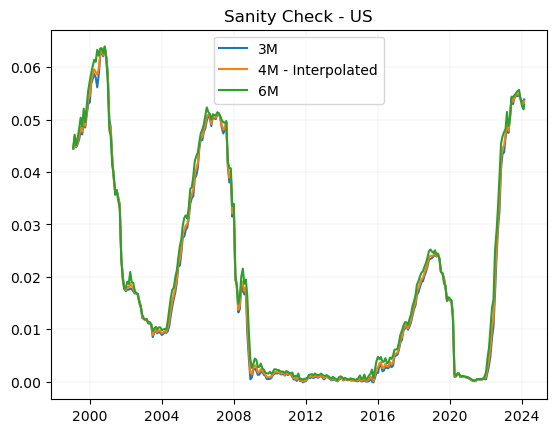

In [69]:
df = interpolate_yield(us_yield_df['Date'], us_yield_df, 4)

Y_m = df['Yearly Yield']

plt.plot(us_yield_df['Date'], us_yield_df['3M']/100)
plt.plot(us_yield_df['Date'], Y_m)
plt.plot(us_yield_df['Date'], us_yield_df['6M']/100)
plt.title('Sanity Check - US')
plt.legend(['3M', '4M - Interpolated', '6M'])
plt.grid(linewidth=0.1)

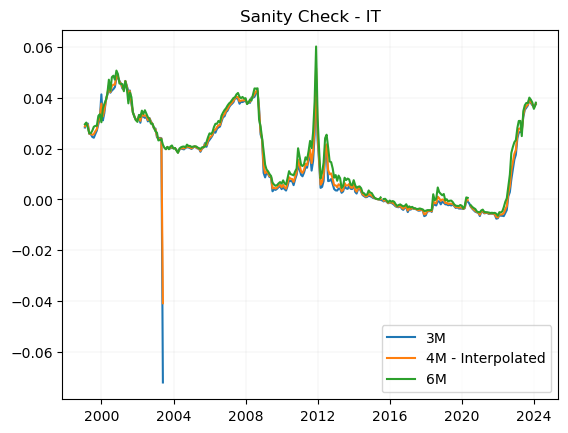

In [70]:
df = interpolate_yield(it_yield_df['Date'], it_yield_df, 4)

Y_m = df['Yearly Yield']

plt.plot(it_yield_df['Date'], it_yield_df['3M']/100)
plt.plot(it_yield_df['Date'], Y_m)
plt.plot(it_yield_df['Date'], it_yield_df['6M']/100)
plt.title('Sanity Check - IT')
plt.legend(['3M', '4M - Interpolated', '6M'])
plt.grid(linewidth=0.1)

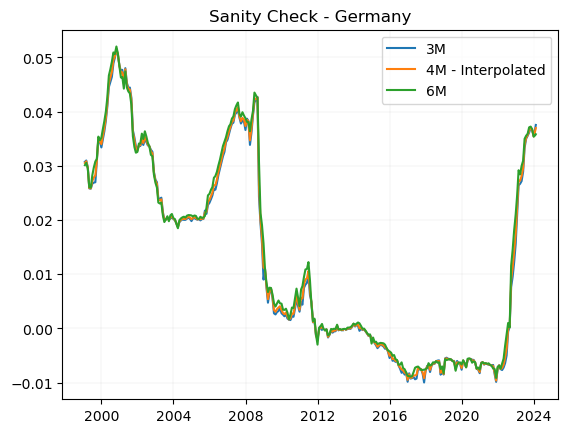

In [71]:
df = interpolate_yield(ger_yield_df['Date'], ger_yield_df, 4)

Y_m = df['Yearly Yield']

plt.plot(ger_yield_df['Date'], ger_yield_df['3M']/100)
plt.plot(ger_yield_df['Date'], Y_m)
plt.plot(ger_yield_df['Date'], ger_yield_df['6M']/100)
plt.title('Sanity Check - Germany')
plt.legend(['3M', '4M - Interpolated', '6M'])
plt.grid(linewidth=0.1)

### Compute the USD yield for Italy

In [82]:
def compute_USD_yield(m):
    
    # compute interpolated yields for each country (x,y,z) are the yearly rates...
    IT   = interpolate_yield(it_yield_df['Date'], it_yield_df, m)
    Y_it = IT['Monthly Yield']
    
    GER   = interpolate_yield(ger_yield_df['Date'], ger_yield_df, m)
    Y_ger = GER['Monthly Yield']
    
    US   = interpolate_yield(us_yield_df['Date'], us_yield_df, m)
    Y_us = US['Monthly Yield']
    
    # compute italian yield in USD
    Y_it_usd = (1+Y_it)*(1+Y_us)/(1+Y_ger) - 1
    
    new_df = pd.DataFrame({'Dates': it_yield_df['Date'], 'USD Monthly Yield': Y_it_usd})
    
    return new_df
    

In [83]:
compute_USD_yield(4)

,Dates,USD Monthly Yield
0,2024-02-08,0.004415
1,2024-01-31,0.004393
2,2023-12-31,0.004382
3,2023-11-30,0.004455
4,2023-10-31,0.004577
...,...,...
297,1999-05-31,0.003829
298,1999-04-30,0.003734
299,1999-03-31,0.003642
300,1999-02-28,0.003744


### Load Coupon calendar 

In [73]:
# Load cash flow calendar 
calendar = pd.read_excel('Cashflow_calendar.xlsx')

In [74]:
# Create 'Months to Maturity'
calendar['Months to Maturity'] = (pd.to_datetime(calendar['Maturity']) - pd.to_datetime(calendar['Issued'])).dt.days // 30

In [80]:
calendar

,ISIN,Issued,Maturity,Interest,Coupon,Principal,Coupon_1,Coupon_2,Coupon_3,Coupon_4,...,Coupon_52,Coupon_53,Coupon_54,Coupon_55,Coupon_56,Coupon_57,Coupon_58,Coupon_59,Unnamed: 65,Months to Maturity
0,US465410BN76,2005-01-21 00:00:00,1/21/2015,4.500,2.2500,100,2005-07-21,2006-01-21,2006-07-21,2007-01-21,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,121
1,US465410BQ08,1/25/2006,1/25/2016,4.750,2.3750,100,2006-07-25,2007-01-25,2007-07-25,2008-01-25,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,121
2,US465410BV92,1/26/2010,2015-07-26 00:00:00,3.125,1.5625,100,2010-07-26,2011-01-26,2011-07-26,2012-01-26,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,66
3,US465410BX58,10/17/2019,10/17/2024,2.375,1.1875,100,2020-04-17,2020-10-17,2021-04-17,2021-10-17,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,60
4,US465410BY32,10/17/2019,2029-10-17 00:00:00,2.875,1.4375,100,2020-04-17,2020-10-17,2021-04-17,2021-10-17,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,121
5,US465410BZ07,2019-10-17 00:00:00,2049-10-17 00:00:00,4.000,2.0000,100,2020-04-17,2020-10-17,2021-04-17,2021-10-17,...,2045-10-17,2046-04-17,2046-10-17,2047-04-17,2047-10-17,2048-04-17,2048-10-17,2049-04-17,NaT,365
6,US465410AZ16,10/25/2001,2006-10-25 00:00:00,4.375,2.1875,100,2002-04-25,2002-10-25,2003-04-25,2003-10-25,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,60
7,US465410BU10,10/5/2009,10/5/2012,2.125,1.0625,100,2010-04-05,2010-10-05,2011-04-05,2011-10-05,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,36
8,US465410BM93,6/30/2004,2007-12-14 00:00:00,3.750,1.8750,100,2004-12-14,2005-06-14,2005-12-14,2006-06-14,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,42
9,US465410AW84,2/22/2001,2011-02-22 00:00:00,6.000,3.0000,100,2001-08-22,2002-02-22,2002-08-22,2003-02-22,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,121


#### Test with one bond

In [75]:
# Take one bond with just a couple of coupons to test! 
bond_test = calendar[calendar['ISIN']=='US465410AT55']

# Drop NaT (useless columns for this specific bond)
bond_test = bond_test.dropna(axis=1)

In [84]:
bond_test

,ISIN,Issued,Maturity,Interest,Coupon,Principal,Coupon_1,Coupon_2,Coupon_3,Months to Maturity
12,US465410AT55,5/2/2000,5/2/2002,6.75,3.375,100,2000-11-02,2001-05-02,2001-11-02,24


In [76]:
# Compute the maturity of this bond, and take the yield with equivalent horizon (FOR ALL DAYS IN THE SAMPLE) 
US_yield_test = compute_USD_yield(bond_test['Months to Maturity'].values[0])

In [77]:
# we now look at the yields just for the time window this bond existed...
#window = (bond_test['Issued'].iloc[0] <= US_yield_test['Dates']) & (bond_test['Maturity'].iloc[0] >= US_yield_test['Dates'])
#US_yield_test = US_yield_test[window]

In [186]:
type(bond_test['Coupon_1'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [190]:
t = pd.to_datetime('12-02-2000')

In [191]:
t

Timestamp('2000-12-02 00:00:00')

In [192]:
bond_test['Coupon_1'].iloc[0]

Timestamp('2000-11-02 00:00:00')

In [193]:
relativedelta(t,bond_test['Coupon_1'].iloc[0]).months

1

In [270]:
coupon_columns = [col for col in bond_test.columns if (col.startswith('Coupon_'))]

In [269]:
A = [relativedelta(bond_test[col].iloc[0],t).months>0 for col in bond_test.columns if (col.startswith('Coupon_'))]

In [253]:
Coupon_list_outstanding = bond_test[coupon_columns].iloc[0][A]

In [276]:
for c in Coupon_list_outstanding:
    print(relativedelta(c,t).months)


5
11


In [261]:
Coupon_list_outstanding

Coupon_2   2001-05-02
Coupon_3   2001-11-02
Name: 12, dtype: datetime64[ns]

In [268]:
relativedelta(Coupon_list_outstanding[0], t).months

5

In [288]:
def hypothetical_price(ISIN, calendar, t):
    
    # find the maturity, issuance, rates, etc of a given ISIN
    bond = calendar[calendar['ISIN']==ISIN]
    # Drop NaT (useless columns for this specific bond)
    bond = bond.dropna(axis=1)
    
    maturity = pd.to_datetime(bond['Maturity'].iloc[0])
    issuance = bond['Issued']
    coupon = bond['Coupon']
    
    # identify the columns referring to the coupon dates 
    coupon_columns = [col for col in bond_test.columns if (col.startswith('Coupon_'))]
    
    # condition to identify the outstanding coupons 
    A = [relativedelta(bond_test[col].iloc[0],t).months>0 for col in bond_test.columns if (col.startswith('Coupon_'))]
    
    # generate the list of outstanding coupons 
    Coupon_list_outstanding = bond_test[coupon_columns].iloc[0][A]
    
    aux = 0
    
    for c in Coupon_list_outstanding:
        
        delta_t = relativedelta(c, t).months
        
        aux += coupon/(1+0.003)**delta_t
        
    
    aux += 100/(1+0.003)**relativedelta(maturity,t).months
    price = aux
    
    return price
    
    
    

In [284]:
t

Timestamp('2000-12-02 00:00:00')

In [289]:
hypothetical_price('US465410AT55', calendar, t)

12    105.103837
Name: Coupon, dtype: float64